# Pandas

Today we are going to start using pandas.  Lets review the libraries or packages and what they have done so far.
1.  We always start byt typing %matploltlib inline.  This is a magic function that enables us to plot the data right into our ipython notebook
2.  we import matplot lib.pylab as plt.  This turns on all the graphing capabilities and then uses the shorthand plt. for when we call functions from matplotlib
3.  we import numpy as np.  This turns on math functions and we use the shorthand np.
4.  we from scipy we import stats.  scipy gives us a lot of analysis functions and we use linear regression from stats.
5.  Now we are also going to use pandas.  Pandas is database management.  It lets us take complicated datasets and anlyze them.  You can think of it like a supercharged excel where you combine the organization of excel with the power of a programming language.  It can do amazing things and I am still learning every day.  So lets get started!
1.  What is pandas? http://pandas.pydata.org/index.html  and here is the documentation http://pandas.pydata.org/pandas-docs/version/0.15.2/
1.  import pandas as pd!!!!!!
1.  On a final note you can see I made a numbered list in markdown. To do that you type a number a period and then two spaces.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

## Importing files
We are going to start by finding our csv file and reading it in

I only want to list the csv files so I can see what I can read in.  so I will do ls \*.csv   the star is a wildcard that means everything and then .csv is only ones that end in .csv.  Today we are going to look at data from well water chemistry in Bangladesh. Specifically arsenic concentrations and if people drink the water.  We will also look at the rest of the chemistry.  We are looking at well water arsenic because drinking water with arsenic has negative long term health impacts.  The US standard for arsenic is 10 ppb or 10 ug/L.  The bangladesh standard is 50 ppb.  Lets see what we can learn!  We are going to try and learn about how many people drink water with 10 or 50 ppb arsenic.  (to show the start I had to type \\*)

In [2]:
pwd

u'C:\\work-teaching\\python\\fall15\\BigDataPython'

In [3]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is D0AD-C6E1

 Directory of C:\work-teaching\python\fall15\BigDataPython

02/24/2015  03:36 PM             1,380 Brian.csv
01/22/2015  06:29 PM         4,093,009 central_park.csv
03/23/2015  01:15 PM             1,541 CoreEM09GC01.csv
03/19/2015  12:38 PM            64,749 fldav_ljo.csv
02/13/2015  04:23 PM             2,180 gdp.csv
08/31/2015  02:29 PM             1,125 gdp_only.csv
08/31/2015  02:26 PM             2,180 gdp2.csv
08/11/2015  04:28 PM             1,999 gdp2015.csv
02/12/2015  04:46 PM             4,841 GDP-Lifespan.csv
03/07/2015  04:01 PM            16,753 Libby_Thesis_Data.csv
02/24/2015  02:04 PM            37,289 mystery.csv
02/23/2015  10:49 PM               102 twoD1.csv
03/27/2015  09:58 AM            53,449 weekly_mlo.csv
10/09/2015  10:03 AM            78,927 well_data.csv
03/26/2015  03:27 PM               128 well_sites.csv
02/27/2015  04:09 PM             2,589 Well-As.csv
              16 File(s)      

now we read in a well_data.csv.  But I want to use pandas not and not numpy.  

But we are going to read in some data and try to analyze it.  open the well_data.csv.  It is for wells from Bangladesh. every well has an id#, a latitude and longitude, Depth, if people drink it and then some concentration data.  lets use readcsv to get read in.  In Pandas you are trying to get your data into a dataframe which is like an excel sheet.  It will have column titles and an indexed for rows.  It is all about the dataframes.  When using pandas people name things 'df' a lot.  That is shorthand for dataframe.  I am not a good namer..

In [129]:
well_data=pd.read_csv('well_data.csv')

The data is now magically in the computers memory even if we can't see it we can access it!

## This is important.  Your output may not look like my output.  It changes between computers depending on default settings when you installed.  Don't worry.  If you see data of descriptions you are fine.

just typing well_data will give us some descriptions of what we got!  It used the first row for column names!  I used well_data.head() so I would only see a few lines.  The head of the data.  You can also look at .tail().  Or you should just type well_data and see what it gives you!

In [130]:
well_data.head()

,Well_ID,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,...,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
0,2,23.74,90.31,45,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,23.62,90.60,60,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,23.94,91.46,60,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83,23.80,91.33,50,Y,48084.33842,0.936358,2085.570979,54666.48199,1.260031,...,76.207449,26.104825,NaN,1.019154,78.97747,253.528674,0.1669,83.0137,5.6188,0.1512
4,84,23.98,90.81,150,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
well_data()

Since we didn't set an index it just numbers each row and calls that the index.  But that doesn't help us.  I think we could set the well_id to the index.  When you look at your data above. see how the numbers on the left have no title but are a little offset.  That is the index.  But what is an index.  I am not sure.  It is sort of like a master column that helps us organize the data.  It will make more sense when we get to timeseries analysis.  That is where pandas shines even more.  But lets set and index and use well_id as that is the most important factor.

In [131]:
well_data=well_data.set_index('Well_ID')

In [128]:
print well_data.head()

           Lat    Lon  Depth Drink  Si   P   S  Ca  Fe  Ba  Na  Mg   K  Mn  \
Well_ID                                                                      
3990     23.36  90.23     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2497     23.70  91.34     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3058     23.92  90.47     60     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1571     23.77  90.80     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
215      23.74  90.31     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

         As  Sr       F       Cl      SO4      Br  
Well_ID                                            
3990    NaN NaN  0.0900   26.193  12.0475  0.0112  
2497    NaN NaN     NaN      NaN      NaN     NaN  
3058    NaN NaN  0.1166  110.248  34.2441  0.0313  
1571    NaN NaN     NaN      NaN      NaN     NaN  
215     NaN NaN     NaN      NaN      NaN     NaN  


we can undue the index

In [135]:
well_data=well_data.reset_index()

In [136]:
well_data.head()

,Well_ID,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,...,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
0,2,23.74,90.31,45,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,23.62,90.60,60,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,23.94,91.46,60,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83,23.80,91.33,50,Y,48084.33842,0.936358,2085.570979,54666.48199,1.260031,...,76.207449,26.104825,NaN,1.019154,78.97747,253.528674,0.1669,83.0137,5.6188,0.1512
4,84,23.98,90.81,150,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Or we could just read in the data with the index set.  

In [132]:
well_data=pd.read_csv('well_data.csv',index_col='Well_ID')

If you don't know the column name you can use the column number!

In [11]:
well_data=pd.read_csv('well_data.csv',index_col=0)

The first great trick of pandas!

In [ ]:
print well_data.describe()

A hint of what is to come!  But we just got all of our summary statistics.  

In [ ]:
well_data.boxplot()

That boxplot was hard to see.  What if we just look at As and Fe?

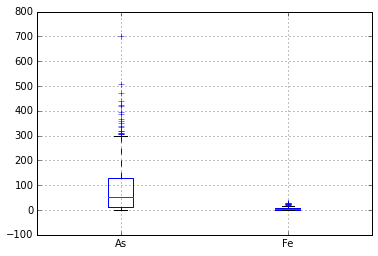

In [108]:
well_data.boxplot(column=['As','Fe'])
ax.get_figure().suptitle("") #This line gets rid of text.

this plotting is a little diffrent then how we have been plotting.  Pandas has some built in plotting so you can make some really nice and quick plots. But these plots are a little harder to customize. So we will both types of plotting depending on the goal.  The goal could be a quick view versus a profesional looking plot.  

We can also just get a list of our columns.

In [15]:
well_data.columns

Index([u'Lat', u'Lon', u'Depth', u'Drink', u'Si', u'P', u'S', u'Ca', u'Fe',
       u'Ba', u'Na', u'Mg', u'K', u'Mn', u'As', u'Sr', u'F', u'Cl', u'SO4',
       u'Br'],
      dtype='object')

Remember NaN is not a number.  We are going to use this to our advantage! 

shape still gives us the shape.  We can call it two different ways

In [16]:
well_data.shape

(759, 20)

In [17]:
np.shape(well_data)

(759, 20)

Now how do we get at our data.  How do we slice it.  There are many ways. lets go through them all.

.ix

.loc

.iloc

[]

We are going to do a lot of practice and then I tried to make a cheat sheet/table.  Take lots of notes.  

[] works like normal except you can only use integers on rows and names on columns.  you can't use integers on both rows and columns.   

I am putting .head() on the print statements to save paper. You don't need them.

In [110]:
print well_data[:].head()  #I am including head to shorten my printouts

          Lat    Lon  Depth Drink  Si   P   S  Ca  Fe  Ba  Na  Mg   K  Mn  As  \
Well_ID                                                                         
2        23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
14       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
23       23.8  90.65     60     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
83       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
84       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

         Sr       F       Cl      SO4      Br  
Well_ID                                        
2       NaN  0.0900   26.193  12.0475  0.0112  
14      NaN     NaN      NaN      NaN     NaN  
23      NaN  0.1166  110.248  34.2441  0.0313  
83      NaN     NaN      NaN      NaN     NaN  
84      NaN     NaN      NaN      NaN     NaN  


In [111]:
print well_data['As'].head()

Well_ID
2    NaN
14   NaN
23   NaN
83   NaN
84   NaN
Name: As, dtype: float64


In [112]:
print well_data[:]['As'].head()

Well_ID
2    NaN
14   NaN
23   NaN
83   NaN
84   NaN
Name: As, dtype: float64


In [114]:
print well_data[30:50]['As']

Well_ID
330     78.977470
333     26.400455
342     68.556548
356           NaN
374           NaN
389           NaN
397           NaN
398           NaN
402      1.368709
403     33.534598
410     56.040172
414    318.936338
415     52.427434
417     27.729503
418           NaN
420     63.935174
421           NaN
434           NaN
475           NaN
478           NaN
Name: As, dtype: float64


In [24]:
print well_data[30:50:2]['As']

Well_ID
330    78.977470
342    68.556548
374          NaN
397          NaN
402     1.368709
410    56.040172
415    52.427434
418          NaN
421          NaN
475          NaN
Name: As, dtype: float64


But you can pass a list to the columns you want!

In [26]:
print well_data[30:50:2][['As','Depth']]

                As  Depth
Well_ID                  
330      78.977470     50
342      68.556548     60
374            NaN     50
397            NaN    150
402       1.368709     60
410      56.040172     67
415      52.427434     50
418            NaN     70
421            NaN     60
475            NaN     75


And the order doesn't matter

In [27]:
print well_data[['As','Depth']][30:50:2]

                As  Depth
Well_ID                  
330      78.977470     50
342      68.556548     60
374            NaN     50
397            NaN    150
402       1.368709     60
410      56.040172     67
415      52.427434     50
418            NaN     70
421            NaN     60
475            NaN     75


In [28]:
print well_data[['Depth','As']][30:50:2]

         Depth         As
Well_ID                  
330         50  78.977470
342         60  68.556548
374         50        NaN
397        150        NaN
402         60   1.368709
410         67  56.040172
415         50  52.427434
418         70        NaN
421         60        NaN
475         75        NaN


.loc only uses names of the index and the columns. 

In [115]:
print well_data.loc[:].head()  #gives us all rows with all indexes

          Lat    Lon  Depth Drink  Si   P   S  Ca  Fe  Ba  Na  Mg   K  Mn  As  \
Well_ID                                                                         
2        23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
14       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
23       23.8  90.65     60     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
83       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
84       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

         Sr       F       Cl      SO4      Br  
Well_ID                                        
2       NaN  0.0900   26.193  12.0475  0.0112  
14      NaN     NaN      NaN      NaN     NaN  
23      NaN  0.1166  110.248  34.2441  0.0313  
83      NaN     NaN      NaN      NaN     NaN  
84      NaN     NaN      NaN      NaN     NaN  


In [30]:
print well_data.loc[101:156]  
#gives us all rows with all indexes but the numbers have to match an index

           Lat    Lon  Depth Drink  Si   P   S  Ca  Fe  Ba  Na  Mg   K  Mn  \
Well_ID                                                                      
101      23.77  90.63     60     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
107      23.77  90.63     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
110      23.76  90.63     75     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
112      23.76  90.63     60     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
116      23.76  90.63    180     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
130      23.76  90.63    160     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
153      23.76  90.63    185     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
156      23.76  90.63     45     N NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

         As  Sr       F       Cl      SO4      Br  
Well_ID                                            
101     NaN NaN     NaN      NaN      NaN     NaN  
107     NaN NaN  0.0733  38.9047   8.0634  0.0143  
110     NaN

In [35]:
print well_data.loc[101]   # just call one index

Lat      23.77
Lon      90.63
Depth       60
Drink        Y
Si         NaN
P          NaN
S          NaN
Ca         NaN
Fe         NaN
Ba         NaN
Na         NaN
Mg         NaN
K          NaN
Mn         NaN
As         NaN
Sr         NaN
F          NaN
Cl         NaN
SO4        NaN
Br         NaN
Name: 101, dtype: object


In [ ]:
print well_data.loc[102]   # if the index doesn't exist you get an error

But we can use column names

In [116]:
print well_data.loc[:]['As'].head()

Well_ID
2    NaN
14   NaN
23   NaN
83   NaN
84   NaN
Name: As, dtype: float64


Plus it can seperata with commas as well as multiple brackets

In [117]:
print well_data.loc[:,'As'].head()

Well_ID
2    NaN
14   NaN
23   NaN
83   NaN
84   NaN
Name: As, dtype: float64


In [41]:
print type(well_data.loc[:]['As'])
print type(well_data.loc[:,'As'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [45]:
print well_data.loc[300:500:2]['As']

Well_ID
330    78.977470
342    68.556548
374          NaN
397          NaN
402     1.368709
410    56.040172
415    52.427434
418          NaN
421          NaN
475          NaN
481          NaN
488          NaN
500    80.627214
Name: As, dtype: float64


We can also add a list of names

In [46]:
print well_data.loc[300:500:2][['As','Depth']]

                As  Depth
Well_ID                  
330      78.977470     50
342      68.556548     60
374            NaN     50
397            NaN    150
402       1.368709     60
410      56.040172     67
415      52.427434     50
418            NaN     70
421            NaN     60
475            NaN     75
481            NaN     60
488            NaN     45
500      80.627214     60


##iloc
iloc only uses integers.  So now this is row numbers. NOT the index.  look the Well_ID compared to the iloc numberss

In [118]:
print well_data.iloc[:].head()

          Lat    Lon  Depth Drink  Si   P   S  Ca  Fe  Ba  Na  Mg   K  Mn  As  \
Well_ID                                                                         
2        23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
14       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
23       23.8  90.65     60     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
83       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
84       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

         Sr       F       Cl      SO4      Br  
Well_ID                                        
2       NaN  0.0900   26.193  12.0475  0.0112  
14      NaN     NaN      NaN      NaN     NaN  
23      NaN  0.1166  110.248  34.2441  0.0313  
83      NaN     NaN      NaN      NaN     NaN  
84      NaN     NaN      NaN      NaN     NaN  


In [50]:
print well_data.iloc[101:110:2]

           Lat    Lon  Depth Drink           Si         P             S  \
Well_ID                                                                   
901      23.79  90.65     45     Y          NaN       NaN           NaN   
922      23.79  90.65     60     N  39711.04494  1.202475   1713.619468   
944      23.79  90.65     45     Y          NaN       NaN           NaN   
955      23.79  90.65     45     Y  49486.04857  0.122758  10355.431740   
979      23.79  90.65     45     Y  49162.30770  0.343976   2910.615555   

                  Ca         Fe          Ba         Na         Mg   K  \
Well_ID                                                                 
901              NaN        NaN         NaN        NaN        NaN NaN   
922      27794.01714  16.444496  165.007263  35.213826  15.770947 NaN   
944              NaN        NaN         NaN        NaN        NaN NaN   
955      55082.57902   1.347131  100.353303  49.182460  34.856190 NaN   
979      40413.40766   2.146537   72

and column number.  But we use a column seperator.......

In [51]:
print well_data.iloc[101:110:2,5]

Well_ID
901         NaN
922    1.202475
944         NaN
955    0.122758
979    0.343976
Name: P, dtype: float64


In [52]:
print well_data.iloc[101:110:2,2:5]

         Depth Drink           Si
Well_ID                          
901         45     Y          NaN
922         60     N  39711.04494
944         45     Y          NaN
955         45     Y  49486.04857
979         45     Y  49162.30770


Just to boggles your bind a little.....

In [54]:
print well_data.iloc[101:110:2,[2,5,8]]  #I just had it show columns 2,5,8

         Depth         P         Fe
Well_ID                            
901         45       NaN        NaN
922         60  1.202475  16.444496
944         45       NaN        NaN
955         45  0.122758   1.347131
979         45  0.343976   2.146537


.ix does a mixture of .loc and .iloc

In [55]:
print well_data.ix[101:110:2,[2,5,8]]

         Depth   P  Fe
Well_ID               
101         60 NaN NaN
110         75 NaN NaN


In [56]:
print well_data.ix[101:156:2][['As','Depth']]

         As  Depth
Well_ID           
101     NaN     60
110     NaN     75
116     NaN    180
153     NaN    185


They say it is better to be explicit and use [],iloc, or loc.

## Dot notation
I am not sure if that is the official name but here is how it works

What I didn't show you is a dot notation.

In [119]:
well_data.As.head()

Well_ID
2    NaN
14   NaN
23   NaN
83   NaN
84   NaN
Name: As, dtype: float64

In [60]:
well_data.As[20:30]

Well_ID
233           NaN
237           NaN
275           NaN
279    139.696393
280      5.364619
283     15.527153
287     43.553692
290      4.798313
292    150.232701
295     28.070949
Name: As, dtype: float64

All examples in one place so maybe we can make sense of them?



|Name                                     |Description|
|-----------------------------------------|-----------------------|
|[]||
|print well_data[:]          |             all data |
|print well_data[:]['As']    |            all arsenic data |
|well_data.loc[:,'As']                    |basically the same as above|
|print well_data['As']                    |all arsenic data.|
|well_data[1:10]['As']              |arsenic data from rows 1-10 excluding 10|
|well_data[1:10:2]['As']            |same but skippint by two|
|well_data[1:10:2][['As','Depth']]  |for As and depth.  note the double brackets.|
|well_data[['As','Depth']][1:10:2]  |order doesn't matter|
|well_data[['Depth','As']][1:10:2]  |order doesn't matter.|  
|you can't use column numbers...................................  | |

|loc| |
|---------------------------------:|--------------------------------:|
|well_data.loc[:]  |gives us all rows with all columns|
|well_data.loc[101:156]  |needs to be an index  Gives us by index number not row number.|
|well_data.loc[101:156:2] | and we can skip|
|well_data.loc[101:156:2]['As'] | and we can do column names|
|well_data.loc[:]['As']|  |
|well_data.loc[:,'As'] | is the same as above. I have bugs where one works but other doesn't|
|well_data.loc[101:156:2][['As','Depth']]|  we can do multiple columns|
|................................................................................| .|


|iloc| |
|-----------------------------------------|-----------------------|
|well_data.iloc[:]                   |gives it all.|
|well_data.iloc[101:110:2]           |does row numbers.|
|well_data.iloc[101:110:2,5]         |row number by column number|
|well_data.iloc[101:110:2,2:5]        |mulitple row multiple number|
|well_data.iloc[101:110:2,[2,5,8]]    |select columns|
|...........................................................................|.|

|ix |I guess we won't use this much|
|-----------------------------------------|-----------------------|
|well_data.ix[101:156:2][['As','Depth']]||
|well_data.ix[101:110:2,[2,5,8]]||


|Dot notation. |This can be very nice.|
|-----------------------------------------|-----------------------|
|well_data.As       |gives all arsenic data|
|well_data.As[1:5]  |gives rows 1-5|
|...............................................................||


### You can use boolean choices to get the data you want.  For example I gave the description if people drink or don't drink from their well.  Lets count that.  

I am going to do the same thing many different ways!

In [61]:
print well_data['Drink'].value_counts()

Y    614
N    144
dtype: int64


is the same as

In [62]:
print well_data.Drink.value_counts()

Y    614
N    144
dtype: int64


In [63]:
print well_data.iloc[:,3].value_counts()

Y    614
N    144
dtype: int64


In [64]:
print well_data.loc[:,'Drink'].value_counts()

Y    614
N    144
dtype: int64


In [65]:
print well_data.ix[:,'Drink'].value_counts()

Y    614
N    144
dtype: int64


Now you should be able to access your data.  I always forget the semantics.  Look online or back at your cheat sheets.  That is why I made the cheat sheet above.

Now we can sub-select data very easily.  

We can return a boolean based on results.  

In [121]:
print well_data['Drink']=='Y'

Well_ID
2          True
14         True
23         True
83         True
84         True
93         True
101        True
107        True
110        True
112        True
116        True
130        True
153        True
156       False
166        True
173        True
176        True
205        True
214        True
217        True
233        True
237        True
275        True
279       False
280        True
283        True
287        True
290        True
292        True
295        True
          ...  
7808      False
7814       True
7817      False
7832      False
7835       True
7840       True
7851       True
7867       True
7868       True
7871       True
7880       True
7886       True
7888       True
7949       True
7953       True
7954       True
7959       True
7960       True
7968       True
7973       True
7974       True
7979       True
7984       True
7993       True
7996       True
7997       True
7998       True
70100     False
72000     False
140000    False
Name: Drink, dty

Also do it with the dot notation

In [ ]:
print well_data.Drink=='Y'

What if we only wanted arsenic concentrations where people drink the water?

In [122]:
print well_data['As'][well_data.Drink=='Y'].head()

Well_ID
2    NaN
14   NaN
23   NaN
83   NaN
84   NaN
Name: As, dtype: float64


Could we ask what are the well id's for people who drink water and their arsenic is greater than 250 ppb.  This would be poeple with high exposure!  We would need to use an and statement.  In pandas you use a logical_and().  For example if we wanted we could then try to convinces these households to switch.  

In [70]:
print well_data['As'][np.logical_and(well_data.Drink=='Y',well_data.As>250)]

Well_ID
493     271.752307
1145    282.519542
1165    267.553524
1440    351.206317
1469    270.785974
1868    285.971884
1919    506.750799
2071    255.620635
2303    700.890000
2875    309.920000
2880    368.900000
2900    304.690000
2917    422.070000
3763    439.690000
4824    339.300000
7835    256.610000
7851    299.530000
7993    308.880000
Name: As, dtype: float64


Can we look at who drinks from their wells and if they don't drink is it beacuse it has more arsenic?

In [71]:
print well_data['As'][well_data.Drink=='Y'].describe() 
print well_data['As'][well_data.Drink=='N'].describe()

count    336.000000
mean      72.484421
std       91.571489
min        0.000000
25%        9.962403
50%       39.975000
75%       99.294435
max      700.890000
Name: As, dtype: float64
count     71.000000
mean     171.105792
std      107.308224
min        1.368709
25%       81.614239
50%      150.250000
75%      250.245000
max      473.340000
Name: As, dtype: float64


Could we disply this data?  

{'boxes': [<matplotlib.lines.Line2D at 0x17e0a6d8>],
 'caps': [<matplotlib.lines.Line2D at 0x17d92b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x17e1a3c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x17e0ae10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x17db2160>,
  <matplotlib.lines.Line2D at 0x17d9b2b0>]}

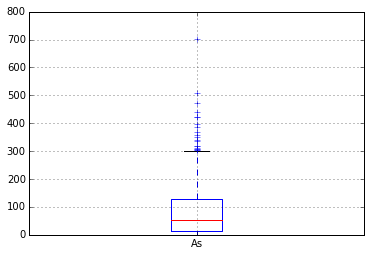

In [72]:
well_data.boxplot(column='As')

But we really want two boxplots.  One for people who drink and one for people who don't drink.  I wasn't sure how to do it?  So I googles pandas boxplot.  Here are two of the links I got.  See if you can figure it out!


http://pandas-docs.github.io/pandas-docs-travis/visualization.html#box-plots

http://stackoverflow.com/questions/23232989/boxplot-stratified-by-column-in-python-pandas

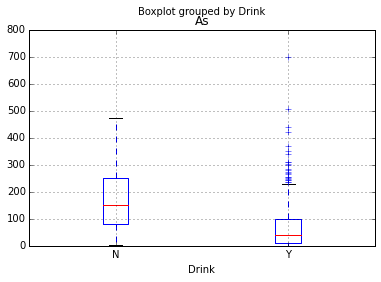

What difference do you notice about the arsenic concentrations of peeople drinking from their wells?

For our final exercise. Lets put it together and get data and then see if we can plot it.  I want to know the number of people who are drinking from there wells based on the arsenic concentrations.  Can we do the reverse.  if the arsenic is <10,10-50, and >50 what is the value counts of drinking and not drinking.  I chose these numbers because 10 ppb is the EPA and WHO drinking water limit.  50 ppb is the Bangladesh drinking water limit.  We see negative health effects at 10ppb.    

I would first just try and break the data into 3 groups and print out the results.  So use your way of selecting data and select data based on the levels of arsenic.  To do between 10 and 50 you will need to use an and statement and how to do those is different.  you need to use the logical_and() fucntion.  numpy logical_and(argument1, argument2) works by taking tow arguments and then returning what happens the same way as if you did an and.  but it works better.  

Three Groups
1.  <10 ppb arsenic
1.  10-50 ppb arsenic
1.  \>50 ppb arsenic

1.  Print out the number of people drinking from wells with arsenic less than 10.  you can use value_counts() and your selection method.

In [112]:
print 'people drinking with <10 \n',well_data['Drink'][well_data.As<=10].value_counts() 


people drinking with <10 
Y    84
N     1
dtype: int64


2.  Next use determine the  people drinking from wells with arsenic more than 50. 


people drinking with >50 
Y    147
N     66
dtype: int64


3.  Now use your logical_and() to determine between 10 and 50.  


people drinking with 10-50 
Y    105
N      4
dtype: int64


This is a bad way of looking at the data.  I would like to make bar plot.  Here is my goal.  Cand we get there?  

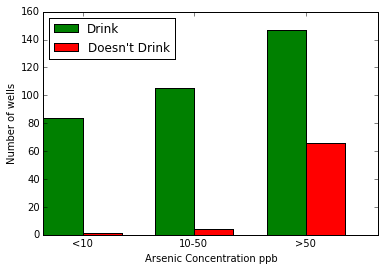

First lets look up bar plot.  http://matplotlib.org/examples/api/barchart_demo.html  This is the example on all the web pages.   We can make sense of it.  Lets do one step at a time.  What plt.bar wants is (x,y,width).  lets do it for As<10 first.  Here is our data again.  

In [122]:
print 'people drinking with <10 \n',well_data['Drink'][well_data.As<=10].value_counts() 

people drinking with <10 
Y    84
N     1
dtype: int64


So we want to plot 84 Drink, 1 Doesn't drink.  I will do it longhand first time.

<Container object of 1 artists>

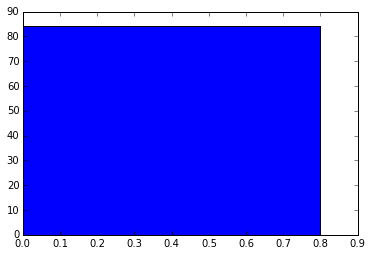

In [74]:
fig,ax=plt.subplots()
ax.bar(0,84)

The default width is 0.8 starting from 0.  Now we need to add the doesn't drink.  

<Container object of 1 artists>

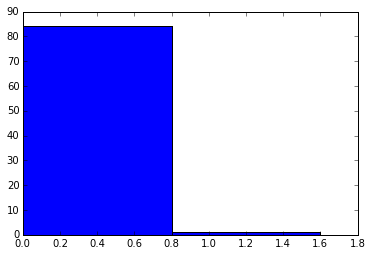

In [75]:
fig,ax=plt.subplots()
ax.bar(0,84)
ax.bar(0.8,1)

Now we need to add colors and labels for a legend.  

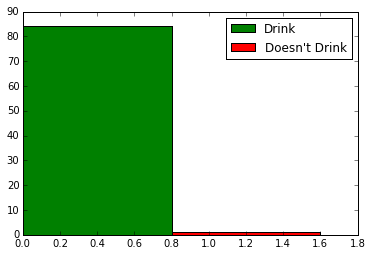

In [77]:
fig,ax=plt.subplots()
ax.bar(0,84,color='g',label='Drink')
ax.bar(0.8,1,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')

this is a disaster.  We can't hard wire it all. We need to be better in our programming and be what people call pythonic.  The first trick is setting this fig,ax=plt.subplots()   this will help us get access to all parts of the graph later on and is just telling the program to make one plot in one location. Later in the course we will do multiple subplots.  now instead of setting the x-axis to zero lets use np.arange.  Then also lets set the width. We will also make the second bar start at one width  

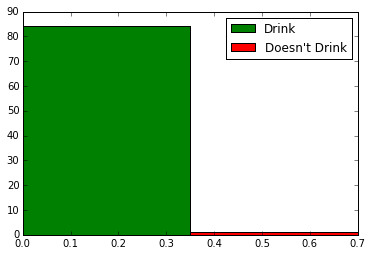

In [78]:
fig,ax=plt.subplots() 
width=0.35
xvalues=np.arange(1)
ax.bar(xvalues,84,width,color='g',label='Drink')
ax.bar(xvalues+width,1,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')

Now we are starting to make progress.  But we need the other two sets of bars.  We will need a set of yes and no values.  so we need yes[0],yes[1],yes[2] representing our values.  I would make a nump array of zeros and then fill it in.  So to make a numpy array of zeros.  then fill in the array.  we know the length has to be three.

In [79]:
yes=np.zeros(3)
print yes

[ 0.  0.  0.]


Now do the same for no.  then set each one equal to the correct result that you have above where you printed out the results.  don't print the results like you did above.  set them to yes,no given the correct array spot.  At the end you should now have yes and no set for the three levels.    

[  84.  105.  147.] [  1.   4.  66.]


Now we can do a bar plot of yes and no.  Go copy and past your barplot code from above.  but now make the x-axis have an np.arange of 3 b/c we want 3 locations.  And don't use the hardwired number put in your new yes and no arrays you just made.

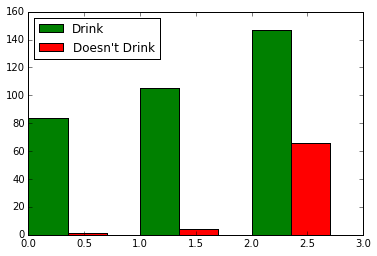

Now you are looking great with a wonderful graph.  lets label everything.  We just need an x-axis labeled correctly.  Also, I would put all the code in one cell so it always works smoothly.  If we go back to our webpage with the example we can use ax.set_xticks(xvalues+width) to get us the xticks we want.  then we can add ax.set_xticklabels(('names','names','names')).  We can also use ax.set_xlabel() and ax.set_ylabel()

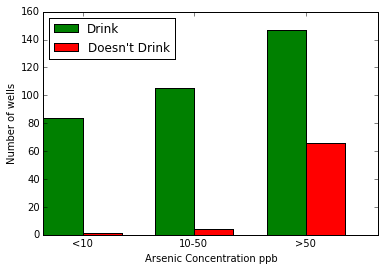

Now that is a great looking graph. You just need to add a figure caption.  I would write something like

Number of wells categorized by if the respondents drink or don't drink from the well and stratified by arsenic concentration.

As a total bonus and if you have time you could change it from the number of wells to the proportion of wells in each category.  

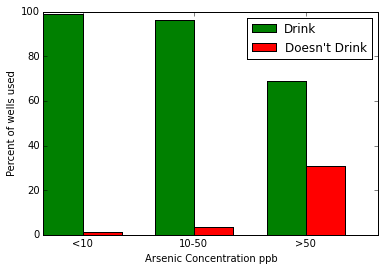

In [100]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=well_data['Drink'][well_data.As<=10].value_counts() / well_data.As[well_data.As<=10].count() *100.
yes[1],no[1]=well_data['Drink'][np.logical_and(well_data.As<=50,well_data.As>=10)].value_counts()\
            /well_data.As[np.logical_and(well_data.As<=50,well_data.As>=10)].count() *100.
yes[2],no[2]=well_data['Drink'][well_data.As>=50].value_counts() /well_data.As[well_data.As>=50].count() *100.

fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues+width,no,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')
ax.set_xticks(xvalues+width)
ax.set_xticklabels(('<10','10-50','>50'))
ax.set_xlabel('Arsenic Concentration ppb')
ax.set_ylabel('Percent of wells used')

I thought it might be nice to stack the bars since they add up to 100..... See http://matplotlib.org/examples/pylab_examples/bar_stacked.html  It is "easy"  I used the bottom keyword. Then I removed the width offset and tweaked a few other things

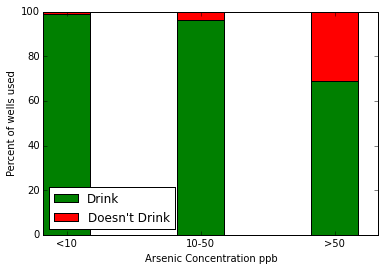

### Answers

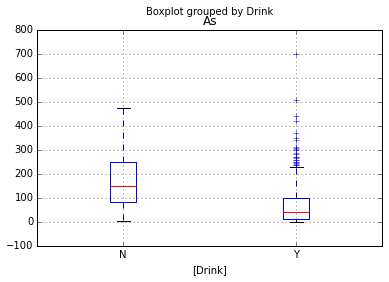

In [100]:
well_data.boxplot(column='As',by='Drink')

In [117]:
print 'people drinking with <10 \n',well_data['Drink'][well_data.As<=10].value_counts() 

people drinking with <10 
Y    84
N     1
dtype: int64


In [118]:
print '\npeople drinking with >50 \n',well_data['Drink'][well_data.As>=50].value_counts() 


people drinking with >50 
Y    147
N     66
dtype: int64


In [95]:
print '\npeople drinking with 10-50 \n',well_data['Drink'][np.logical_and(well_data.As<=50,well_data.As>=10)].value_counts() 



people drinking with 10-50 
Y    105
N      4
dtype: int64


In [96]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=well_data['Drink'][well_data.As<=10].value_counts() 
yes[1],no[1]=well_data['Drink'][np.logical_and(well_data.As<=50,well_data.As>=10)].value_counts()
yes[2],no[2]=well_data['Drink'][well_data.As>=50].value_counts() 
print yes,no

[  84.  105.  147.] [  1.   4.  66.]


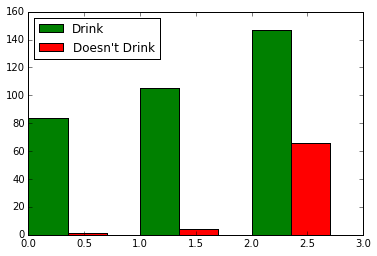

In [173]:
fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues+width,no,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')

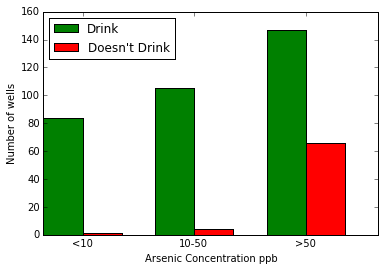

In [99]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=well_data['Drink'][well_data.As<=10].value_counts() 
yes[1],no[1]=well_data['Drink'][np.logical_and(well_data.As<=50,well_data.As>=10)].value_counts()
yes[2],no[2]=well_data['Drink'][well_data.As>=50].value_counts() 

fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues+width,no,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')
ax.set_xticks(xvalues+width)
ax.set_xticklabels(('<10','10-50','>50'))
ax.set_xlabel('Arsenic Concentration ppb')
ax.set_ylabel('Number of wells')

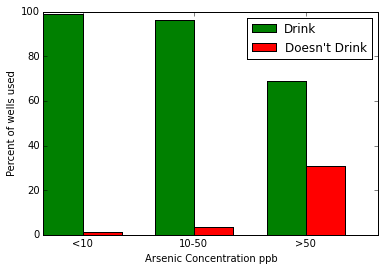

In [94]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=well_data['Drink'][well_data.As<=10].value_counts() / well_data.As[well_data.As<=10].count() *100.
yes[1],no[1]=well_data['Drink'][np.logical_and(well_data.As<=50,well_data.As>=10)].value_counts()\
            /well_data.As[np.logical_and(well_data.As<=50,well_data.As>=10)].count() *100.
yes[2],no[2]=well_data['Drink'][well_data.As>=50].value_counts() /well_data.As[well_data.As>=50].count() *100.

fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues+width,no,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')
ax.set_xticks(xvalues+width)
ax.set_xticklabels(('<10','10-50','>50'))
ax.set_xlabel('Arsenic Concentration ppb')
ax.set_ylabel('Percent of wells used')

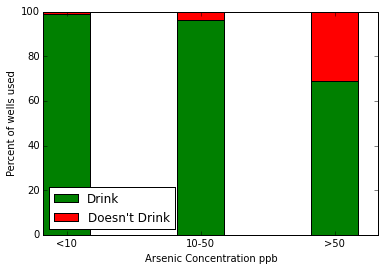

In [105]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=well_data['Drink'][well_data.As<=10].value_counts() / well_data.As[well_data.As<=10].count() *100.
yes[1],no[1]=well_data['Drink'][np.logical_and(well_data.As<=50,well_data.As>=10)].value_counts()\
            /well_data.As[np.logical_and(well_data.As<=50,well_data.As>=10)].count() *100.
yes[2],no[2]=well_data['Drink'][well_data.As>=50].value_counts() /well_data.As[well_data.As>=50].count() *100.

fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues,no,width,color='r',bottom=yes,label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc=3)  #You can try numbers 1-8 for location. see http://matplotlib.org/1.3.1/users/legend_guide.html
ax.set_xticks(xvalues+width/2)
ax.set_xticklabels(('<10','10-50','>50'))
ax.set_xlabel('Arsenic Concentration ppb')
ax.set_ylabel('Percent of wells used')